In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
pre_gam = pd.read_csv('gam.csv')
pre_rainfall = pd.read_csv('rainfall.csv')
pre_ndvi = pd.read_csv('NDVI.csv')
pre_incidents = pd.read_csv('incidents.csv')
pre_fatalities = pd.read_csv('fatalities.csv')
pre_crops = pd.read_csv('crops.csv')

In [3]:
def process_gam(df):
    df = df.copy()
    month_columns = [
        'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 
        'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
        'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'
    ]
    for col in month_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['Annual GAM'] = df[month_columns].sum(axis=1)

    df_long = df.melt(id_vars=['Region', 'District', 'Annual GAM'], 
                      value_vars=month_columns,
                      var_name='Month', 
                      value_name='GAM')

    df_long['Month_num'] = df_long['Month'].apply(lambda x: month_columns.index(x) + 1)
    return df_long

gam = process_gam(pre_gam)
gam.head()

,Region,District,Annual GAM,Month,GAM,Month_num
0,Awdal,Borama,18098.0,Jan-17,147.0,1
1,Awdal,Baki,4772.0,Jan-17,79.0,1
2,Awdal,Lughaye,6796.0,Jan-17,82.0,1
3,Awdal,Zeylac,4306.0,Jan-17,361.0,1
4,Woqooyi Galbeed,Hargeysa,41803.0,Jan-17,1058.0,1


In [4]:
def process_rainfall(df):
    df = df.copy()
    month_columns = [
        'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 
        'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
        'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'
    ]
    for col in month_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['Annual Rainfall'] = df[month_columns].sum(axis=1)

    df_long = df.melt(id_vars=['Region', 'District', 'Annual Rainfall'], 
                      value_vars=month_columns,
                      var_name='Month', 
                      value_name='Rainfall')

    df_long['Month_num'] = df_long['Month'].apply(lambda x: month_columns.index(x) + 1)
    return df_long

rainfall = process_rainfall(pre_rainfall)
rainfall.head()

,Region,District,Annual Rainfall,Month,Rainfall,Month_num
0,Awdal,Borama,1330.455,Jan-17,3.776,1
1,Awdal,Baki,770.469,Jan-17,5.600,1
2,Awdal,Lughaye,429.076,Jan-17,7.026,1
3,Awdal,Zeylac,505.788,Jan-17,7.003,1
4,Woqooyi Galbeed,Hargeysa,999.908,Jan-17,2.170,1


In [5]:
def process_ndvi(df):
    df = df.copy()
    month_columns = [
        'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 
        'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
        'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'
    ]
    for col in month_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['Annual NDVI'] = df[month_columns].sum(axis=1)

    df_long = df.melt(id_vars=['Region', 'District', 'Annual NDVI'], 
                      value_vars=month_columns,
                      var_name='Month', 
                      value_name='NDVI')

    df_long['Month_num'] = df_long['Month'].apply(lambda x: month_columns.index(x) + 1)
    return df_long

ndvi = process_ndvi(pre_ndvi)
ndvi.head()

,Region,District,Annual NDVI,Month,NDVI,Month_num
0,Awdal,Borama,7.510,Jan-17,0.183,1
1,Awdal,Baki,5.184,Jan-17,0.142,1
2,Awdal,Lughaye,3.592,Jan-17,0.101,1
3,Awdal,Zeylac,3.726,Jan-17,0.107,1
4,Woqooyi Galbeed,Hargeysa,2.204,Jan-17,0.000,1


In [6]:
neighbors = ndvi[ndvi['District'].isin(['Balcad', 'Afgooye'])]
mean_ndvi = neighbors.groupby('Month')['NDVI'].mean().reset_index()

mean_annual_ndvi = neighbors['Annual NDVI'].mean()

for _, row in mean_ndvi.iterrows():
    month = row['Month']
    fill_value = row['NDVI']
    ndvi.loc[(ndvi['District'] == 'Mogadishu') & (ndvi['Month'] == month), 'NDVI'] = fill_value

ndvi.loc[ndvi['District'] == 'Mogadishu', 'Annual NDVI'] = mean_annual_ndvi

ndvi[(ndvi['Region'] == 'Banadir') & (ndvi['District'] == 'Mogadishu')].head(12)

,Region,District,Annual NDVI,Month,NDVI,Month_num
44,Banadir,Mogadishu,11.2405,Jan-17,0.3580,1
118,Banadir,Mogadishu,11.2405,Feb-17,0.2470,2
192,Banadir,Mogadishu,11.2405,Mar-17,0.2075,3
266,Banadir,Mogadishu,11.2405,Apr-17,0.2255,4
340,Banadir,Mogadishu,11.2405,May-17,0.2600,5
414,Banadir,Mogadishu,11.2405,Jun-17,0.3475,6
488,Banadir,Mogadishu,11.2405,Jul-17,0.2995,7
562,Banadir,Mogadishu,11.2405,Aug-17,0.2515,8
636,Banadir,Mogadishu,11.2405,Sep-17,0.2580,9
710,Banadir,Mogadishu,11.2405,Oct-17,0.2350,10


In [7]:
def process_incidents(df):
    df = df.copy()
    month_columns = [
        'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 
        'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
        'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'
    ]
    for col in month_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['Annual Incidents'] = df[month_columns].sum(axis=1)

    df_long = df.melt(id_vars=['Region', 'District', 'Annual Incidents'], 
                      value_vars=month_columns,
                      var_name='Month', 
                      value_name='Incidents')

    df_long['Month_num'] = df_long['Month'].apply(lambda x: month_columns.index(x) + 1)
    return df_long

incidents = process_incidents(pre_incidents)
incidents.head()

,Region,District,Annual Incidents,Month,Incidents,Month_num
0,Awdal,Borama,15,Jan-17,0,1
1,Awdal,Baki,5,Jan-17,0,1
2,Awdal,Lughaye,2,Jan-17,0,1
3,Awdal,Zeylac,4,Jan-17,0,1
4,Woqooyi Galbeed,Hargeysa,88,Jan-17,3,1


In [8]:
def process_fatalities(df):
    df = df.copy()
    month_columns = [
        'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 
        'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
        'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'
    ]
    for col in month_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['Annual Fatalities'] = df[month_columns].sum(axis=1)

    df_long = df.melt(id_vars=['Region', 'District', 'Annual Fatalities'], 
                      value_vars=month_columns,
                      var_name='Month', 
                      value_name='Fatalities')

    df_long['Month_num'] = df_long['Month'].apply(lambda x: month_columns.index(x) + 1)
    return df_long

fatalities = process_fatalities(pre_fatalities)
fatalities.head()

,Region,District,Annual Fatalities,Month,Fatalities,Month_num
0,Awdal,Borama,10,Jan-17,0,1
1,Awdal,Baki,4,Jan-17,0,1
2,Awdal,Lughaye,10,Jan-17,0,1
3,Awdal,Zeylac,3,Jan-17,0,1
4,Woqooyi Galbeed,Hargeysa,78,Jan-17,3,1


In [9]:
shabelledhexe_old = 'Shabelle Dhexe'
shabelledhexe_new = 'Lower Shabelle'

pre_crops['Region'] = pre_crops['Region'].replace(shabelledhexe_old, shabelledhexe_new)

shabellehoose_old = 'Shabelle Hoose'
shabellehoose_new = 'Middle Shabelle'

pre_crops['Region'] = pre_crops['Region'].replace(shabellehoose_old, shabellehoose_new)

jubadhexe_old = 'Juba Dhexe'
jubadhexe_new = 'Lower Juba'

pre_crops['Region'] = pre_crops['Region'].replace(jubadhexe_old, jubadhexe_new)

jubahoose_old = 'Juba Hoose'
jubahoose_new = 'Middle Juba'

pre_crops['Region'] = pre_crops['Region'].replace(jubahoose_old, jubahoose_new)

pre_crops = pre_crops.drop('Zone', axis=1)

pre_crops.head()

,Region,District,Year,Crop,Livelihood System,Season,Production
0,Gedo,Baardheere,2019,Maize,Riverine,Deyr,660.0
1,Gedo,Baardheere,2019,Onion,Riverine,Deyr,840.0
2,Gedo,Baardheere,2019,Cowpea,Riverine,Deyr,16.0
3,Gedo,Baardheere,2019,Sesame,Riverine,Deyr,210.0
4,Gedo,Baardheere,2019,Tomatoe,Riverine,Deyr,680.0


In [10]:
seasonal_production = (pre_crops.groupby(['Region', 'District', 'Year', 'Season'])['Production'].sum().reset_index())

crops = seasonal_production.pivot_table(
    index=['Region', 'District', 'Year'],
    columns='Season',
    values='Production',
    fill_value=0
).reset_index()

crops = crops.rename(
    columns={'Deyr': 'Deyr', 'Gu': 'Gu'}
)

crops['Annual Production'] = (
    crops['Deyr'] + crops['Gu']
)

crops.head()

Season,Region,District,Year,Deyr,Gu,Annual Production
0,Awdal,Borama,2017,809.97,0.0,809.97
1,Awdal,Borama,2018,2000.00,0.0,2000.00
2,Awdal,Borama,2019,0.00,6790.0,6790.00
3,Bakool,Rab Dhuure,2017,176.00,48.0,224.00
4,Bakool,Rab Dhuure,2018,118.00,172.0,290.00


In [11]:
merged = (
    gam
    .merge(rainfall, on=['Region', 'District', 'Month', 'Month_num'], how='left')
    .merge(ndvi, on=['Region', 'District', 'Month', 'Month_num'], how='left')
    .merge(incidents, on=['Region', 'District', 'Month', 'Month_num'], how='left')
    .merge(fatalities, on=['Region', 'District', 'Month', 'Month_num'], how='left')
    .merge(crops, on=['Region', 'District'], how='left')
)

def create_lags(df, column_name, lags):
    df = df.sort_values(['Region', 'District', 'Month_num'])
    for lag in lags:
        df[f'{column_name}_lag{lag}'] = df.groupby(['Region', 'District'])[column_name].shift(lag)
    return df

lag_vars = ['Rainfall', 'NDVI', 'Incidents', 'Fatalities', 'Annual Production', 'GAM']
for var in lag_vars:
    merged = create_lags(merged, var, [1, 3, 6])

final_columns = [
    'Region', 'District', 'Month', 'GAM', 'Month_num', 'Rainfall', 'NDVI','Incidents', 'Fatalities', 'Annual Production', 
    'Rainfall_lag1', 'Rainfall_lag3', 'Rainfall_lag6', 'NDVI_lag1', 'NDVI_lag3', 'NDVI_lag6', 'Incidents_lag1', 'Incidents_lag3', 'Incidents_lag6',
    'Fatalities_lag1', 'Fatalities_lag3', 'Fatalities_lag6', 'Annual Production_lag1', 'Annual Production_lag3', 'Annual Production_lag6',
    'GAM_lag1', 'GAM_lag3', 'GAM_lag6'
]

final = merged[final_columns].sort_values(['Month_num', 'Region', 'District'])


print("Final dataset shape:", final.shape)
final.head()

Final dataset shape: (4536, 28)


,Region,District,Month,GAM,Month_num,Rainfall,NDVI,Incidents,Fatalities,Annual Production,...,Incidents_lag6,Fatalities_lag1,Fatalities_lag3,Fatalities_lag6,Annual Production_lag1,Annual Production_lag3,Annual Production_lag6,GAM_lag1,GAM_lag3,GAM_lag6
3,Awdal,Baki,Jan-17,79.0,1,5.600,0.142,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Awdal,Borama,Jan-17,147.0,1,3.776,0.183,0,0,809.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Awdal,Borama,Jan-17,147.0,1,3.776,0.183,0,0,2000.00,...,NaN,0.0,NaN,NaN,809.97,NaN,NaN,147.0,NaN,NaN
2,Awdal,Borama,Jan-17,147.0,1,3.776,0.183,0,0,6790.00,...,NaN,0.0,NaN,NaN,2000.00,NaN,NaN,147.0,NaN,NaN
4,Awdal,Lughaye,Jan-17,82.0,1,7.026,0.101,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gam_annual = gam.groupby(['Region', 'District'])[['Annual GAM']].mean().reset_index()
rainfall_annual = rainfall.groupby(['Region', 'District'])[['Annual Rainfall']].mean().reset_index()
ndvi_annual = ndvi.groupby(['Region', 'District'])[['Annual NDVI']].mean().reset_index()
incidents_annual = incidents.groupby(['Region', 'District'])[['Annual Incidents']].sum().reset_index()
fatalities_annual = fatalities.groupby(['Region', 'District'])[['Annual Fatalities']].sum().reset_index()
crops_annual = crops.groupby(['Region', 'District'])[['Annual Production']].sum().reset_index()

annual = gam_annual.merge(rainfall_annual, on=['Region', 'District'], how='left'
                         ).merge(ndvi_annual, on=['Region', 'District'], how='left'
                                ).merge(incidents_annual, on=['Region', 'District'], how='left'
                                       ).merge(fatalities_annual, on=['Region', 'District'], how='left'
                                              ).merge(crops_annual, on=['Region', 'District'], how='left')

annual.head()

,Region,District,Annual GAM,Annual Rainfall,Annual NDVI,Annual Incidents,Annual Fatalities,Annual Production
0,Awdal,Baki,4772.0,770.469,5.184,180,144,NaN
1,Awdal,Borama,18098.0,1330.455,7.510,540,360,9599.97
2,Awdal,Lughaye,6796.0,429.076,3.592,72,360,NaN
3,Awdal,Zeylac,4306.0,505.788,3.726,144,108,NaN
4,Bakool,Ceel Barde,19269.0,1132.344,10.141,504,756,NaN


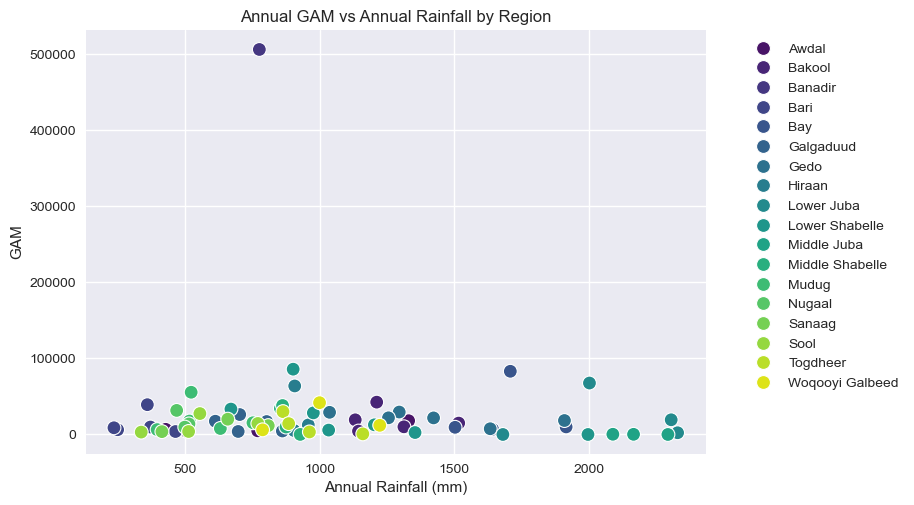

In [13]:
sns.scatterplot(
    data=annual,
    x='Annual Rainfall',
    y='Annual GAM',
    hue='Region',
    s=100,
    palette='viridis'
)

plt.title('Annual GAM vs Annual Rainfall by Region')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('GAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

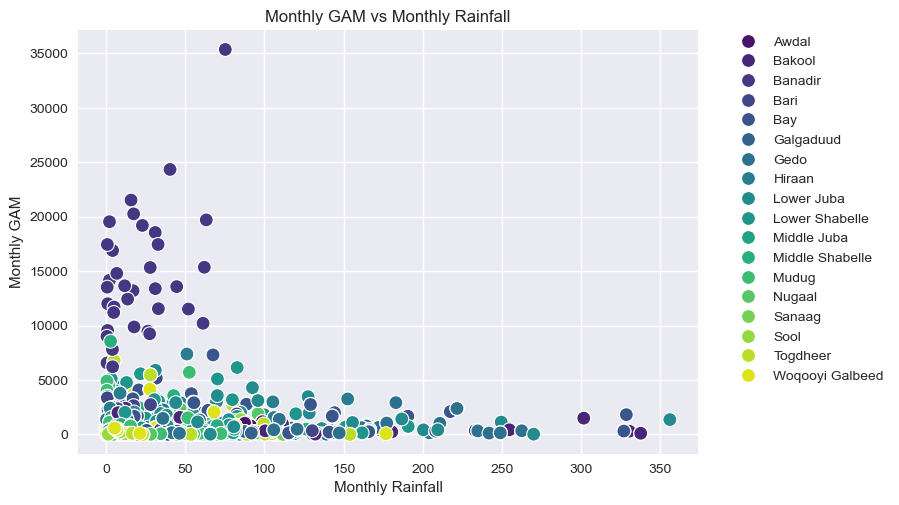

In [14]:
sns.scatterplot(
    data=final,
    x='Rainfall',
    y='GAM',
    hue='Region',
    palette='viridis', 
    s=100,              
)

plt.title('Monthly GAM vs Monthly Rainfall')
plt.xlabel('Monthly Rainfall')
plt.ylabel('Monthly GAM')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

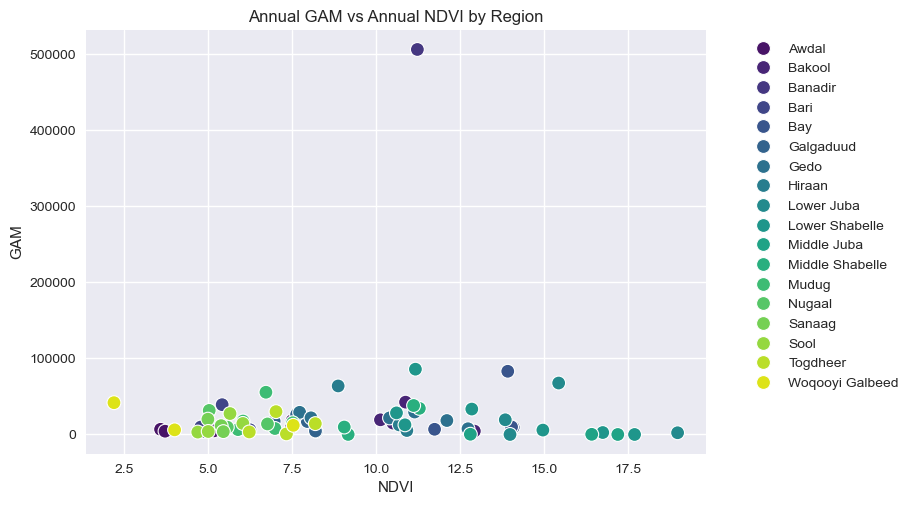

In [15]:
sns.scatterplot(
    data=annual,
    x='Annual NDVI',
    y='Annual GAM',
    hue='Region',
    s=100,
    palette='viridis'
)

plt.title('Annual GAM vs Annual NDVI by Region')
plt.xlabel('NDVI')
plt.ylabel('GAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

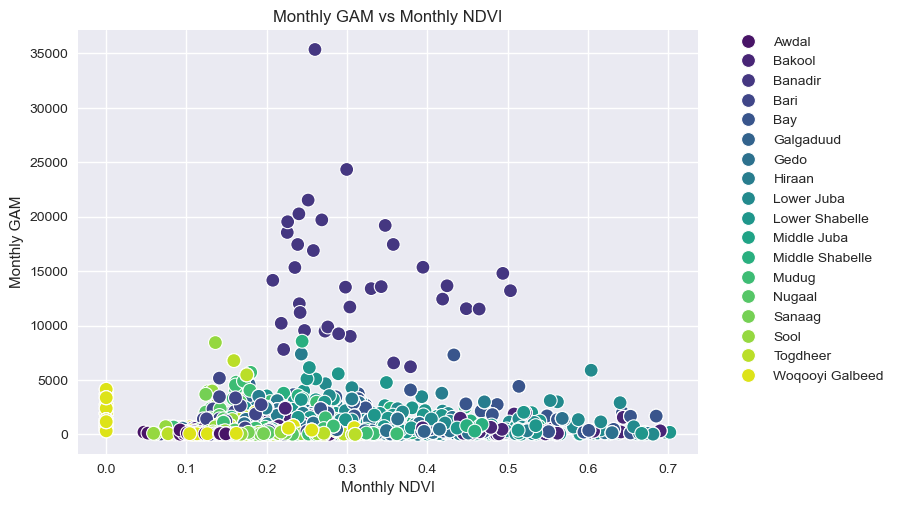

In [16]:
sns.scatterplot(
    data=final,
    x='NDVI',
    y='GAM',
    hue='Region',
    palette='viridis', 
    s=100,              
)

plt.title('Monthly GAM vs Monthly NDVI')
plt.xlabel('Monthly NDVI')
plt.ylabel('Monthly GAM')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

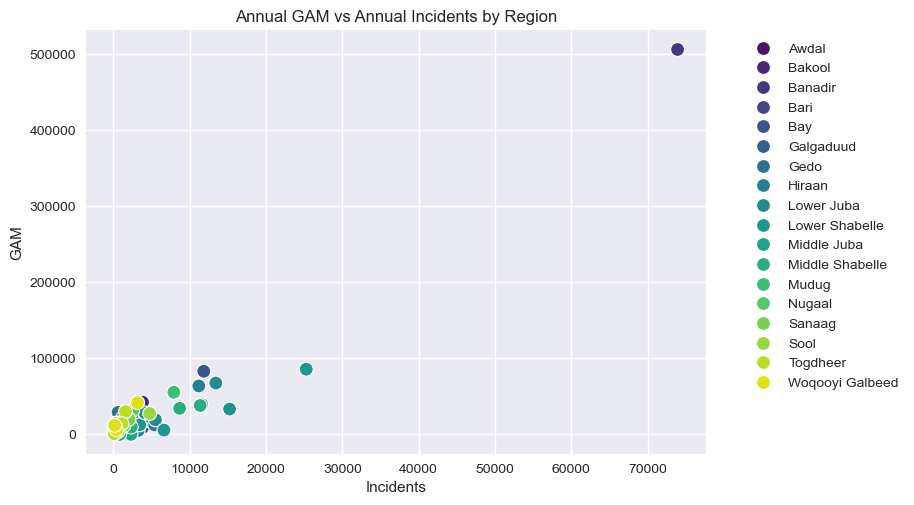

In [17]:
sns.scatterplot(
    data=annual,
    x='Annual Incidents',
    y='Annual GAM',
    hue='Region',
    s=100,
    palette='viridis'
)

plt.title('Annual GAM vs Annual Incidents by Region')
plt.xlabel('Incidents')
plt.ylabel('GAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

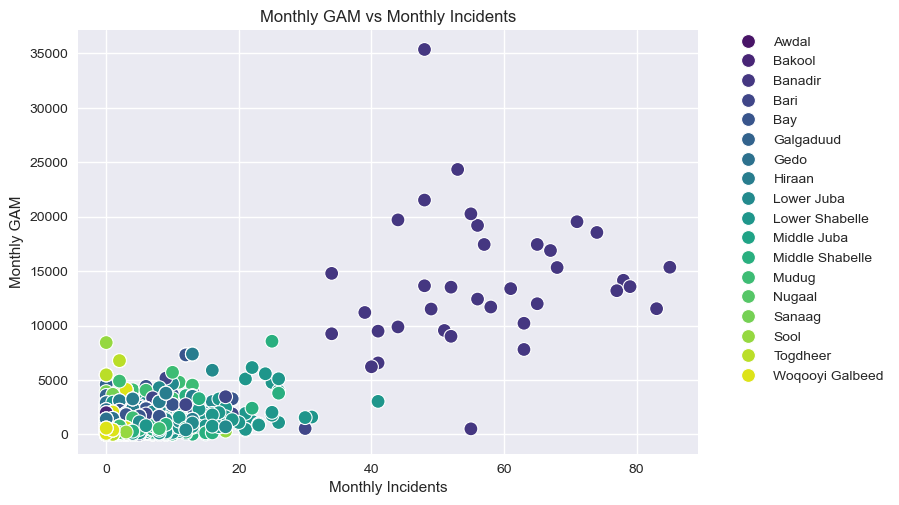

In [18]:
sns.scatterplot(
    data=final,
    x='Incidents',
    y='GAM',
    hue='Region',
    palette='viridis', 
    s=100,              
)

plt.title('Monthly GAM vs Monthly Incidents')
plt.xlabel('Monthly Incidents')
plt.ylabel('Monthly GAM')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

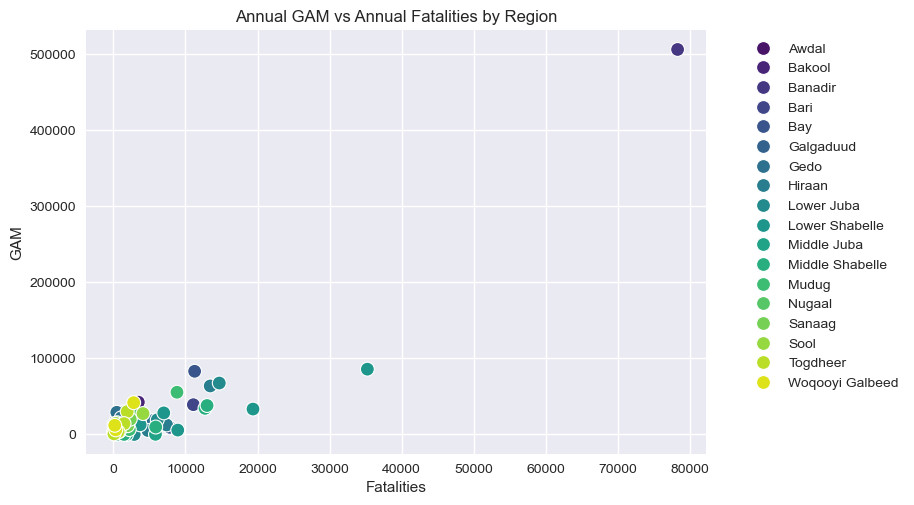

In [19]:
sns.scatterplot(
    data=annual,
    x='Annual Fatalities',
    y='Annual GAM',
    hue='Region',
    s=100,
    palette='viridis'
)

plt.title('Annual GAM vs Annual Fatalities by Region')
plt.xlabel('Fatalities')
plt.ylabel('GAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

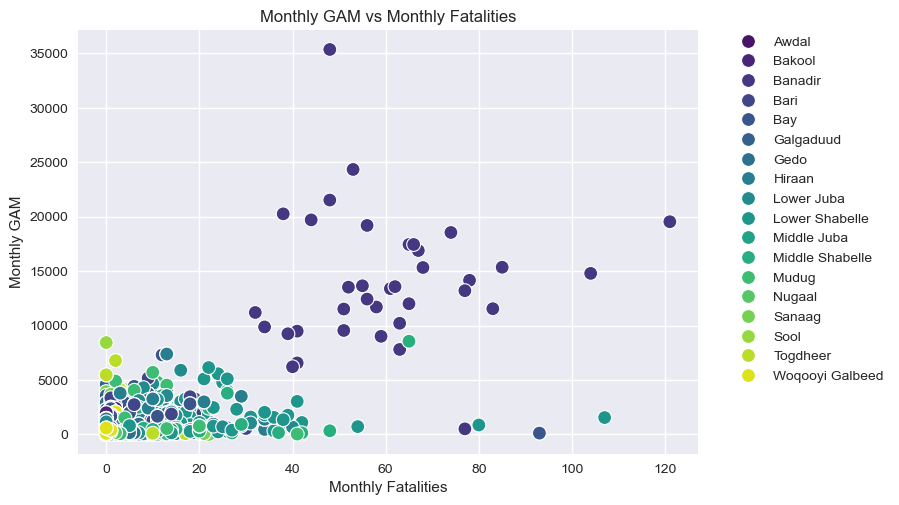

In [20]:
sns.scatterplot(
    data=final,
    x='Fatalities',
    y='GAM',
    hue='Region',
    palette='viridis', 
    s=100,              
)

plt.title('Monthly GAM vs Monthly Fatalities')
plt.xlabel('Monthly Fatalities')
plt.ylabel('Monthly GAM')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

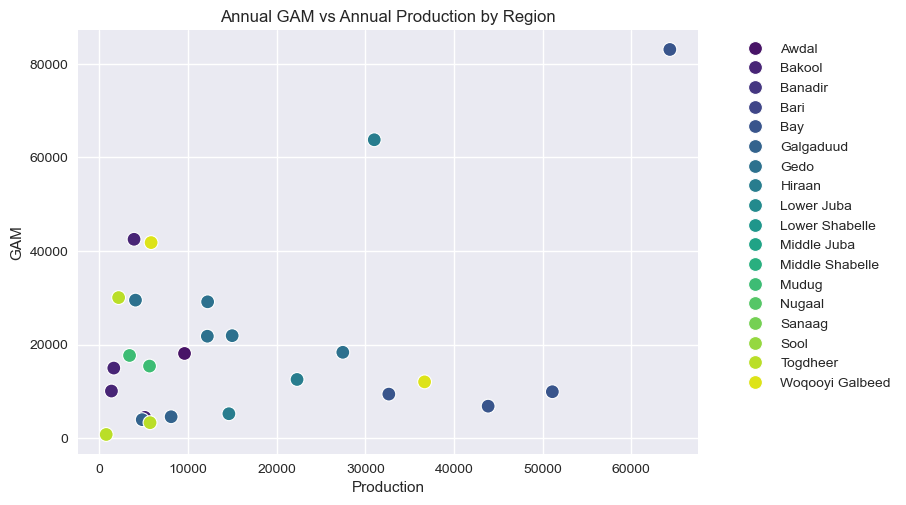

In [21]:
sns.scatterplot(
    data=annual,
    x='Annual Production',
    y='Annual GAM',
    hue='Region',
    s=100,
    palette='viridis'
)

plt.title('Annual GAM vs Annual Production by Region')
plt.xlabel('Production')
plt.ylabel('GAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

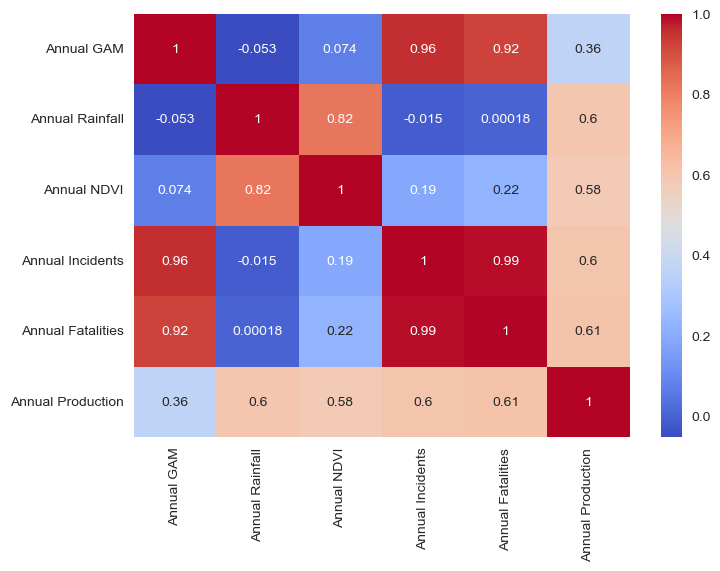

In [22]:
corr_matrix = annual[['Annual GAM', 'Annual Rainfall', 'Annual NDVI', 'Annual Incidents', 'Annual Fatalities', 'Annual Production']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

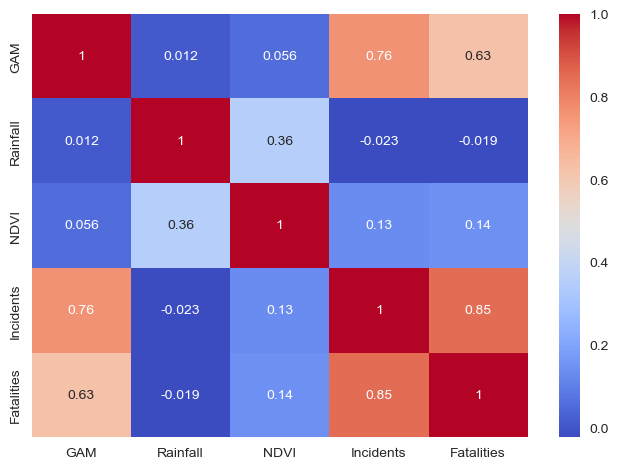

In [23]:
corr_matrix = final[['GAM', 'Rainfall', 'NDVI', 'Incidents', 'Fatalities']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
features = ['Rainfall_lag1', 'NDVI_lag1', 'Incidents_lag1', 'Fatalities_lag1', 'Annual Production_lag1',
            'Rainfall_lag3', 'NDVI_lag3', 'Incidents_lag3', 'Fatalities_lag3', 'Annual Production_lag3',
            'Rainfall_lag6', 'NDVI_lag6', 'Incidents_lag6', 'Fatalities_lag6',
            'GAM_lag1', 'GAM_lag3', 'GAM_lag6'
           ]
target = 'GAM'

In [26]:
reg_df = final.dropna(subset=features + [target]).copy()
reg_df = reg_df.sort_values('Month_num').reset_index(drop=True)

In [27]:
split_idx = int(len(reg_df) * 0.9)
train_df = reg_df.iloc[:split_idx]
test_df = reg_df.iloc[split_idx:]

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])
y_train = train_df[target]
y_test = test_df[target]

In [29]:
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 145119.13
R²: 0.80


In [31]:
input_bari = final[
    (final['Region'] == 'Bari') &
    (final['District'] == 'Bossaso') &
    (final['Month'] == 'Dec-19')
]

In [32]:
input_values_bari = input_bari[features]

print(input_values_bari)

      Rainfall_lag1  NDVI_lag1  Incidents_lag1  Fatalities_lag1  \
4440          7.848      0.186             6.0             14.0   

      Annual Production_lag1  Rainfall_lag3  NDVI_lag3  Incidents_lag3  \
4440                     NaN         24.432      0.152             3.0   

      Fatalities_lag3  Annual Production_lag3  Rainfall_lag6  NDVI_lag6  \
4440              0.0                     NaN         17.358      0.167   

      Incidents_lag6  Fatalities_lag6  GAM_lag1  GAM_lag3  GAM_lag6  
4440             5.0              2.0    1878.0     273.0    2646.0  


In [33]:
input_scaled_bari = scaler.transform(input_values_bari)

In [34]:
gam_pred = model.predict(input_scaled_bari)
print(f"Predicted GAM for Bari, Bossaso, Dec-19: {gam_pred[0]:.2f}")
gam_real = input_bari['GAM'].values[0]
print(f"Actual GAM: {gam_real}")
print(f"Absolute Error: {abs(gam_pred[0] - input_bari['GAM'].iloc[0]):.2f}")

Predicted GAM for Bari, Bossaso, Dec-19: 2511.23
Actual GAM: 2741.0
Absolute Error: 229.77


In [35]:
input_bay = final[
    (final['Region'] == 'Bay') &
    (final['District'] == 'Baydhaba') &
    (final['Month'] == 'Dec-19')
]

In [36]:
input_values_bay = input_bay[features]

print(input_values_bay)

      Rainfall_lag1  NDVI_lag1  Incidents_lag1  Fatalities_lag1  \
4488        142.822      0.685             5.0              1.0   
4489         17.771      0.653             8.0             11.0   
4490         17.771      0.653             8.0             11.0   

      Annual Production_lag1  Rainfall_lag3  NDVI_lag3  Incidents_lag3  \
4488                 17630.0        142.822      0.685             5.0   
4489                 20465.0        142.822      0.685             5.0   
4490                 26252.5        142.822      0.685             5.0   

      Fatalities_lag3  Annual Production_lag3  Rainfall_lag6  NDVI_lag6  \
4488              1.0                 20465.0        328.556      0.481   
4489              1.0                 26252.5        328.556      0.481   
4490              1.0                 17630.0        328.556      0.481   

      Incidents_lag6  Fatalities_lag6  GAM_lag1  GAM_lag3  GAM_lag6  
4488             3.0              1.0    1688.0    1688.0    18

In [37]:
input_scaled_bay = scaler.transform(input_values_bay)

In [38]:
gam_pred = model.predict(input_scaled_bay)
print(f"Predicted GAM for Bay, Baydhaba, Dec-19: {gam_pred[0]:.2f}")
gam_real = input_bay['GAM'].values[0]
print(f"Actual GAM: {gam_real}")
print(f"Absolute Error: {abs(gam_pred[0] - input_bay['GAM'].iloc[0]):.2f}")

Predicted GAM for Bay, Baydhaba, Dec-19: 1801.87
Actual GAM: 1673.0
Absolute Error: 128.87
